In [1]:
import os
import json
import sqlite3

import pandas as pd

In [2]:
filepath = 'data/'

In [3]:
data = []

for filename in os.listdir(filepath):
    cnx = sqlite3.connect(filepath + filename)
    df_string = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cnx)
    df_ull = pd.read_sql_query("SELECT * FROM COUNTERS_ULL_TIME_DATA", cnx)
    df_data = pd.concat([df_string, df_ull], ignore_index = True)
    data.append(pd.DataFrame(df_data))

In [4]:
df = pd.concat(data, ignore_index = True)

In [5]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])
df['PRIVATE_DATA'] = df['PRIVATE_DATA'].astype(int)
df['VALUE'] = df['VALUE'].str.lower()

In [6]:
df.dtypes

MEASUREMENT_TIME    datetime64[ns]
ID_INPUT                     int64
VALUE                       object
PRIVATE_DATA                 int32
dtype: object

In [7]:
df = df.sort_values(by = ['MEASUREMENT_TIME'], ignore_index = True)

In [8]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2023-01-15 18:20:31.552,3,esrv.exe,0
1,2023-01-15 18:20:31.552,11,NaN,0
2,2023-01-15 18:20:31.552,10,NaN,0
3,2023-01-15 18:20:31.552,9,NaN,0
4,2023-01-15 18:20:31.552,8,NaN,0
...,...,...,...,...
3919,2023-01-16 04:29:33.175,5,consolewindowclass,0
3920,2023-01-16 04:29:33.175,10,NaN,0
3921,2023-01-16 04:29:33.175,3,esrv.exe,0
3922,2023-01-16 04:29:33.175,1,NaN,0


In [12]:
df.shape[0]/12 # number of unique entries

327.0

In [15]:
import numpy as np
import pandas as pd

In [21]:
tmp = df[df.ID_INPUT == 4]

In [23]:
tmp.VALUE.unique()

array(['vsdebugconsole.exe', 'explorer.exe', 'devenv.exe',
       'applicationframehost.exe', 'chrome.exe',
       'shellexperiencehost.exe', 'searchapp.exe',
       'unable to open process', 'snippingtool.exe',
       'db browser for sqlite.exe', 'code.exe',
       'codesetup-stable-97dec172d3256f8ca4bfb2143f3f76b503ca0534.tmp',
       'idman.exe', 'msedge.exe'], dtype=object)

In [24]:
len(tmp.VALUE.unique())

14

In [31]:
tmp.groupby('VALUE').count().sort_values(by="ID_INPUT", ascending=False) # executable can have the extension "tmp"

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA
VALUE,,,
chrome.exe,88,88,88
vsdebugconsole.exe,44,44,44
explorer.exe,43,43,43
msedge.exe,27,27,27
applicationframehost.exe,25,25,25
unable to open process,24,24,24
code.exe,23,23,23
devenv.exe,12,12,12
shellexperiencehost.exe,12,12,12


In [33]:
len(df.PRIVATE_DATA.unique())

1

In [43]:
df = df.assign(date = df["MEASUREMENT_TIME"].astype(str).apply(lambda x: x[:10]))

In [46]:
df.groupby('date').count()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
date,,,,
2023-01-15,2448,2448,612,2448
2023-01-16,1476,1476,369,1476


In [49]:
tab_app = df[df.ID_INPUT == 3]
tab_app.groupby('VALUE').count()

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA,date
VALUE,,,,
.rhistory - visual studio code,1,1,1,1
"74% dan pilone, russ miles - head first ...pdf",1,1,1,1
[cse 110] weekly reading - google docs - google chrome,14,14,14,14
[dsc180b] - google docs - google chrome,1,1,1,1
[dsc180b] weekly homework - google docs - google chrome,1,1,1,1
...,...,...,...,...
visual studio code,2,2,2,2
volume control,10,10,10,10
worked_problems_section_53.pdf - google chrome,3,3,3,3


In [53]:
tab_app['VALUE'][:20]

0                                               esrv.exe
18                                             downloads
28                                              esrv.exe
46            dsc180a_hw_week4 - microsoft visual studio
56                                           movies & tv
68            dsc180a_hw_week4 - microsoft visual studio
82                                              esrv.exe
94                                              esrv.exe
105                                          movies & tv
113                                      missing string.
120                                          movies & tv
142                                            downloads
146                                          movies & tv
166                                            downloads
176                                      missing string.
183                                            downloads
198                                          movies & tv
204    public -- 2022-2023 (ccg

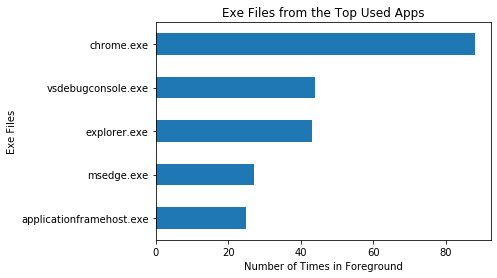

In [9]:
import matplotlib.pyplot as plt
plot = df[df['ID_INPUT'] == 4]['VALUE'].value_counts()[:5].plot.barh(x = 'index', y = 'VALUE')
plot.set_axisbelow(True)
plot.set_xlabel('Number of Times in Foreground')
plot.set_ylabel('Exe Files')
plot.set_title('Exe Files from the Top Used Apps')
plot.invert_yaxis()
#plt.pyplot.grid(axis = 'x')
#plt.pyplot.show()

### Process data for LSTM

In [109]:
df = pd.read_csv("dataUser1.csv")
df.head()

,Unnamed: 0,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,0,2023-01-15 18:20:31.552,4,s0,0
1,1,2023-01-15 18:20:31.552,11,0,0
2,2,2023-01-15 18:20:31.552,10,0,0
3,3,2023-01-15 18:20:31.552,8,154,0
4,4,2023-01-15 18:20:31.552,7,1049,0


In [110]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])

In [111]:
df = df.assign(day_of_week = df['MEASUREMENT_TIME'].apply(lambda x: x.strftime("%A"))) # https://www.w3schools.com/python/python_datetime.asp

In [112]:
df = df.assign(week_of_year = df['MEASUREMENT_TIME'].apply(lambda x: x.strftime("%W")))

In [113]:
df = df.assign(week_day = df['week_of_year'] + '_' + df['day_of_week'])

In [114]:
df = df[df['ID_INPUT'] == 4]

In [115]:
df = df.reset_index()

In [116]:
duration_series = df[df['ID_INPUT'] == 4].groupby('week_day')['MEASUREMENT_TIME'].diff()[1:]
end_point = pd.Series([duration_series[1]])
app_duration = pd.concat([duration_series, end_point], ignore_index=True)

In [117]:
duration_series

1             00:00:00
2      00:00:02.023000
3      00:00:03.031000
4      00:00:03.021000
5      00:00:01.015000
             ...      
2887   00:00:12.089000
2888   00:03:45.056000
2889   00:02:15.477000
2890   00:00:02.023000
2891   00:00:09.105000
Name: MEASUREMENT_TIME, Length: 2891, dtype: timedelta64[ns]

In [118]:
df = df.reset_index()

In [119]:
df

,level_0,index,Unnamed: 0,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,day_of_week,week_of_year,week_day
0,0,0,0,2023-01-15 18:20:31.552,4,s0,0,Sunday,02,02_Sunday
1,1,11,11,2023-01-15 18:20:31.552,4,VsDebugConsole.exe,0,Sunday,02,02_Sunday
2,2,23,23,2023-01-15 18:20:33.575,4,explorer.exe,0,Sunday,02,02_Sunday
3,3,28,28,2023-01-15 18:20:36.606,4,VsDebugConsole.exe,0,Sunday,02,02_Sunday
4,4,46,46,2023-01-15 18:20:39.627,4,devenv.exe,0,Sunday,02,02_Sunday
...,...,...,...,...,...,...,...,...,...,...
2887,2887,34215,34215,2023-01-27 10:16:22.829,4,Code.exe,0,Friday,04,04_Friday
2888,2888,34220,34220,2023-01-27 10:20:07.885,4,chrome.exe,0,Friday,04,04_Friday
2889,2889,34236,34236,2023-01-27 10:22:23.362,4,Code.exe,0,Friday,04,04_Friday
2890,2890,34250,34250,2023-01-27 10:22:25.385,4,chrome.exe,0,Friday,04,04_Friday


In [120]:
df = df.assign(app_duration = app_duration)

In [121]:
# import datetime
# datetime.datetime.strptime('00:00:00', '%H:%M:%S').time()

In [125]:
app_delta_time = df.groupby(['VALUE', 'week_day'])['app_duration'].sum().reset_index()

In [128]:
app_delta_time[app_delta_time['VALUE'] == 'Code.exe']

,VALUE,week_day,app_duration
9,Code.exe,02_Sunday,00:10:23.406000
10,Code.exe,03_Friday,00:34:00.291000
11,Code.exe,03_Monday,01:17:56.711000
12,Code.exe,03_Saturday,00:06:54.594000
13,Code.exe,03_Thursday,00:16:33.322000
14,Code.exe,03_Tuesday,00:03:52.021000
15,Code.exe,03_Wednesday,00:06:58.724000
16,Code.exe,04_Friday,02:08:37.343000
17,Code.exe,04_Monday,00:18:18.208000
18,Code.exe,04_Thursday,01:25:39.644000
